In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns


In [2]:
def add(climate_data, url, name):
    data_city= pd.read_table(url, delim_whitespace=True, names=('Month', 'Day', 'Year', name))
    d1=data_city[['Month', 'Day', 'Year']]                       
    data_city['Date']=pd.to_datetime(d1)
    data_city=data_city[['Date',name]]
    climate_data=climate_data.merge(data_city, on = 'Date')
    return climate_data

In [3]:
N='AK_Anchorage_Temp'
url_1='https://academic.udayton.edu/kissock/http/Weather/gsod95-current/AKANCHOR.txt'
data_Anchorage = pd.read_table(url_1, delim_whitespace=True, names=('Month', 'Day', 'Year', N))
data_Anchorage.head()

,Month,Day,Year,AK_Anchorage_Temp
0,1,1,1995,23.2
1,1,2,1995,27.6
2,1,3,1995,32.0
3,1,4,1995,29.3
4,1,5,1995,30.1


In [4]:
data_Anchorage.shape

(9265, 4)

In [5]:
date1=data_Anchorage[['Month', 'Day', 'Year']]

In [6]:
data_Anchorage['Date']=pd.to_datetime(date1)

In [7]:
data_Anchorage.head()

,Month,Day,Year,AK_Anchorage_Temp,Date
0,1,1,1995,23.2,1995-01-01
1,1,2,1995,27.6,1995-01-02
2,1,3,1995,32.0,1995-01-03
3,1,4,1995,29.3,1995-01-04
4,1,5,1995,30.1,1995-01-05


In [8]:
data_Anchorage=data_Anchorage[['Date','AK_Anchorage_Temp' ]]
climate_data=data_Anchorage

In [9]:
url_2='https://academic.udayton.edu/kissock/http/Weather/gsod95-current/NDFARGO.txt'
climate_data=add(climate_data,url_2, 'ND_Fargo_Temp')

In [10]:
#Download all the text form data

city_list=[['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/FLWPALMB.txt', 'FL_West_Palm_Beach_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/VTBURLIN.txt', 'Vermont_Burlington_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/TXELPASO.txt', 'TX_El_Paso_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/WYCHEYEN.txt', 'Wyoming_Cheyenne_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/CASANFRA.txt','San_Francisco_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/OHCLEVEL.txt','Cleveland_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/WIMILWAU.txt','Milwaukee_Temp'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/NYNEWYOR.txt','New_York_City'], 
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/HIHONOLU.txt', 'Honolulu_Temp'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/EGCAIRO.txt', 'Egypt_Cairo'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/INDELHI.txt','India_Delhi'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/CIBIEJNG.txt','China_Beijing'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/SRSINGAP.txt','Singapore_Temp'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/NZACKLND.txt', 'New_Zealand Auckland'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/RSMOSCOW.txt', 'Russia_Moscow'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/AGBUENOS.txt', 'Argentina Buenos_Aires'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/PRLIMA.txt','Peru_Lima']]


In [11]:
#Read files from the website
for url in city_list:
    climate_data=add(climate_data, url[0], url[1])
climate_data.shape

(7627, 20)

In [12]:
climate_data=climate_data.set_index(['Date'])

In [13]:
# Replace the outliers in the temperature data
climate_data=climate_data.replace(-99, np.nan)

In [14]:
# Use the linear method fill the null.
climate_data.interpolate(method='linear', inplace=True)

In [15]:
# calculate the monthly average temperature of each city.
climate_m=climate_data.groupby(pd.DatetimeIndex(climate_data.index).to_period('M')).mean()
climate_m.head()

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,New_York_City,Honolulu_Temp,Egypt_Cairo,India_Delhi,China_Beijing,Singapore_Temp,New_Zealand Auckland,Russia_Moscow,Argentina Buenos_Aires,Peru_Lima
Date,,,,,,,,,,,,,,,,,,,
1995-01,16.261290,11.283871,63.751613,28.219355,46.709677,29.890323,51.890323,30.325806,24.996774,37.829032,73.606452,56.600000,55.548387,30.100000,80.351613,67.016129,19.796774,73.351613,74.780645
1995-02,21.246429,13.082143,64.850000,19.696429,56.246429,32.875000,53.146429,26.860714,25.703571,31.985714,73.017857,59.485714,62.367857,35.642857,79.692857,68.175000,28.796429,71.182143,74.650000
1995-03,18.525806,28.377419,71.412903,35.119355,60.416129,37.090323,53.638710,40.561290,37.870968,44.370968,74.961290,64.477419,70.541935,45.835484,81.761290,65.693548,31.690323,69.745161,73.100000
1995-04,40.026667,38.523333,75.426667,40.633333,65.646667,39.253333,54.273333,46.496667,43.356667,51.003333,75.420000,67.040000,83.113333,58.256667,82.440000,64.196667,46.906667,62.100000,68.253333
1995-05,48.625806,55.212903,80.658065,56.545161,75.848387,44.945161,55.383871,59.435484,57.254839,61.529032,77.477419,74.177419,93.187097,67.667742,83.500000,57.506452,56.548387,55.632258,66.319355


In [16]:
# Found a 1869-2020 temperature data of central park of New York City at  
# https://www.weather.gov/media/okx/Climate/CentralPark/monthlyannualtemp.pdf (National Weather Service Data)
# Convert it to excel file and read it
NY_Temp=pd.read_excel('NY-temp-converted.xlsx')

In [17]:
NY_Temp=NY_Temp.drop(['Unnamed: 13', 'Unnamed: 14'], axis=1)
NY_Temp.dropna(axis=0, inplace=True)

In [18]:
NY_Temp=NY_Temp.drop(index=0)

In [19]:
NY_Temp.rename(columns={'Unnamed: 0':'Year', 'Unnamed: 1':1, 'Unnamed: 2':2, 'Unnamed: 3':3, 'Unnamed: 4':4, 'Unnamed: 5':5, 'Unnamed: 6':6, 'Unnamed: 7':7, 'Unnamed: 8':8, 'Unnamed: 9':9, 'Unnamed: 10':10, 'Unnamed: 11':11, 'Unnamed: 12':12}, inplace=True)


In [20]:
NY_Temp=NY_Temp.melt(id_vars=['Year'],value_name='NYTemp' )
NY_Temp.dtypes

Year        object
variable    object
NYTemp      object
dtype: object

In [21]:
NY_Temp.rename(columns={'variable':'month'}, inplace=True)
NY_Temp['day']=1

In [22]:
NY_Temp['Date']=pd.to_datetime(NY_Temp[['month','day','Year']])
NY_Temp['NYTemp']=NY_Temp['NYTemp'].astype(float)

In [23]:
NY_Temp=NY_Temp[['Date', 'NYTemp']]
NY_Temp=NY_Temp.set_index('Date')


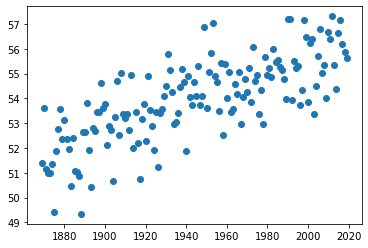

In [24]:
# Calculate the yearly average temperature and plot it (1869-2019, 150 years of yearly mean temperature)

NY_Temp=NY_Temp.sort_index(axis=0,ascending=True)
NY_Y=NY_Temp.groupby(pd.DatetimeIndex(NY_Temp.index).to_period('Y')).mean()
NY_Y.index=NY_Y.index.to_timestamp()
plt.scatter(NY_Y.index, NY_Y['NYTemp']);

In [25]:
# Monthly temperature
NY_Temp

,NYTemp
Date,
1869-01-01,35.1
1869-02-01,34.5
1869-03-01,34.8
1869-04-01,49.2
1869-05-01,57.7
...,...
2019-08-01,75.5
2019-09-01,70.4
2019-10-01,59.9


In [26]:
climate_m=climate_data.groupby(pd.DatetimeIndex(climate_data.index).to_period('M')).mean()

In [27]:
NYC_Temp20=NY_Temp.loc['1995-01-01':'2019-12-01']

In [28]:
# University of Dayton (UD) Temperature Data
climate_m.index=climate_m.index.to_timestamp()
climate_m=climate_m.loc['1995-01-01':'2014-12-01']
climate_m.head()

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,New_York_City,Honolulu_Temp,Egypt_Cairo,India_Delhi,China_Beijing,Singapore_Temp,New_Zealand Auckland,Russia_Moscow,Argentina Buenos_Aires,Peru_Lima
Date,,,,,,,,,,,,,,,,,,,
1995-01-01,16.261290,11.283871,63.751613,28.219355,46.709677,29.890323,51.890323,30.325806,24.996774,37.829032,73.606452,56.600000,55.548387,30.100000,80.351613,67.016129,19.796774,73.351613,74.780645
1995-02-01,21.246429,13.082143,64.850000,19.696429,56.246429,32.875000,53.146429,26.860714,25.703571,31.985714,73.017857,59.485714,62.367857,35.642857,79.692857,68.175000,28.796429,71.182143,74.650000
1995-03-01,18.525806,28.377419,71.412903,35.119355,60.416129,37.090323,53.638710,40.561290,37.870968,44.370968,74.961290,64.477419,70.541935,45.835484,81.761290,65.693548,31.690323,69.745161,73.100000
1995-04-01,40.026667,38.523333,75.426667,40.633333,65.646667,39.253333,54.273333,46.496667,43.356667,51.003333,75.420000,67.040000,83.113333,58.256667,82.440000,64.196667,46.906667,62.100000,68.253333
1995-05-01,48.625806,55.212903,80.658065,56.545161,75.848387,44.945161,55.383871,59.435484,57.254839,61.529032,77.477419,74.177419,93.187097,67.667742,83.500000,57.506452,56.548387,55.632258,66.319355


In [29]:
NYC_Temp20=NYC_Temp20.merge(climate_m[['New_York_City']], how='outer', on='Date')

In [30]:
# Compare the 2 climate dataset of New York City (NYTemp: 1869-2020 data (NWS data), New_York_City: 1995-2014 data (UD data))

NYC_Temp20

,NYTemp,New_York_City
Date,,
1995-01-01,37.5,37.829032
1995-02-01,31.6,31.985714
1995-03-01,45.0,44.370968
1995-04-01,51.9,51.003333
1995-05-01,61.9,61.529032
...,...,...
2019-08-01,75.5,NaN
2019-09-01,70.4,NaN
2019-10-01,59.9,NaN


In [31]:
# Compare UD and NSW data
NYC_Temp20.describe()

,NYTemp,New_York_City
count,300.000000,240.000000
mean,55.590333,55.826862
std,15.589983,15.610041
min,23.900000,25.977419
25%,41.450000,41.398304
50%,55.600000,56.554839
75%,70.925000,70.961667
max,81.400000,82.254839


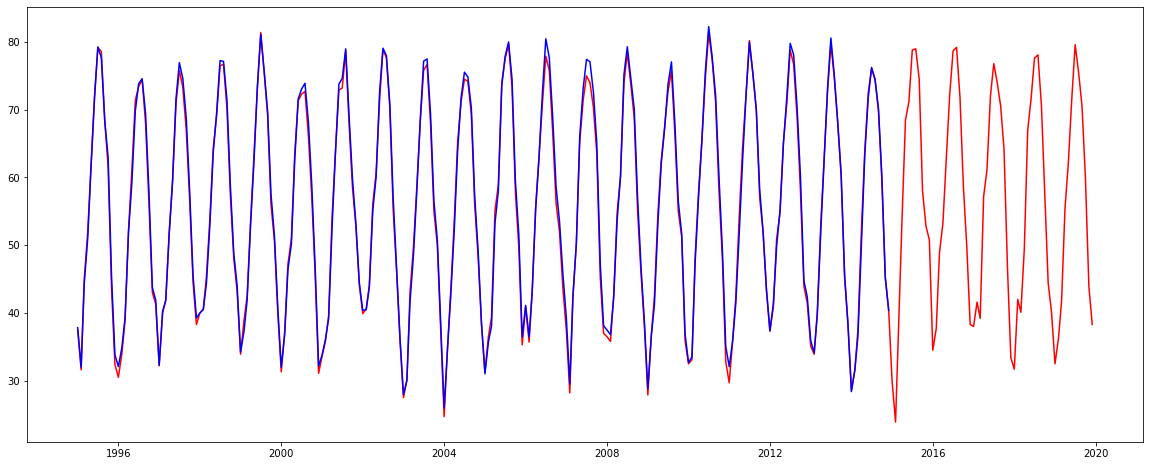

In [32]:
# Plot 2 NYC Temperature data and show the comparison
plt.figure(figsize=(20, 8))
plt.plot(NYC_Temp20.index,NYC_Temp20['NYTemp'], c='r', label='NY Central Park')
plt.plot(NYC_Temp20.index,NYC_Temp20['New_York_City'], c ='b', label="New York City")
plt.show()
#There is some slight difference bewteen 2 NYC temperature datasets.

In [33]:
# Only choose date, Burlington and Cleveland temperature as NYC temperature features
NYC_m=climate_m[['Vermont_Burlington_Temp', 'Cleveland_Temp','New_York_City','Milwaukee_Temp']]
NYC_m

,Vermont_Burlington_Temp,Cleveland_Temp,New_York_City,Milwaukee_Temp
Date,,,,
1995-01-01,28.219355,30.325806,37.829032,24.996774
1995-02-01,19.696429,26.860714,31.985714,25.703571
1995-03-01,35.119355,40.561290,44.370968,37.870968
1995-04-01,40.633333,46.496667,51.003333,43.356667
1995-05-01,56.545161,59.435484,61.529032,57.254839
...,...,...,...,...
2014-08-01,68.522581,70.267742,74.438710,69.503226
2014-09-01,62.190000,63.510000,70.153333,61.936667
2014-10-01,53.525806,53.580645,60.254839,51.319355


In [34]:
#Monthly temperatures
NYC_m['Month']= pd.DatetimeIndex(NYC_m.index).month
NYC_m['Year']= pd.DatetimeIndex(NYC_m.index).year
NYC_m

<ipython-input-34-c74db4c9cd63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYC_m['Month']= pd.DatetimeIndex(NYC_m.index).month
<ipython-input-34-c74db4c9cd63>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYC_m['Year']= pd.DatetimeIndex(NYC_m.index).year


,Vermont_Burlington_Temp,Cleveland_Temp,New_York_City,Milwaukee_Temp,Month,Year
Date,,,,,,
1995-01-01,28.219355,30.325806,37.829032,24.996774,1,1995
1995-02-01,19.696429,26.860714,31.985714,25.703571,2,1995
1995-03-01,35.119355,40.561290,44.370968,37.870968,3,1995
1995-04-01,40.633333,46.496667,51.003333,43.356667,4,1995
1995-05-01,56.545161,59.435484,61.529032,57.254839,5,1995
...,...,...,...,...,...,...
2014-08-01,68.522581,70.267742,74.438710,69.503226,8,2014
2014-09-01,62.190000,63.510000,70.153333,61.936667,9,2014
2014-10-01,53.525806,53.580645,60.254839,51.319355,10,2014


In [35]:
NYC_m['Month']=NYC_m['Month'].astype('str')

<ipython-input-35-456cf397231d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYC_m['Month']=NYC_m['Month'].astype('str')


In [36]:
NYC_m.dtypes

Vermont_Burlington_Temp    float64
Cleveland_Temp             float64
New_York_City              float64
Milwaukee_Temp             float64
Month                       object
Year                         int64
dtype: object

In [37]:
#Treat month as the categorical feature
X=NYC_m[['Vermont_Burlington_Temp','Cleveland_Temp','Year', 'Month']]
X=dummy=pd.get_dummies(X)
X

,Vermont_Burlington_Temp,Cleveland_Temp,Year,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9
Date,,,,,,,,,,,,,,,
1995-01-01,28.219355,30.325806,1995,1,0,0,0,0,0,0,0,0,0,0,0
1995-02-01,19.696429,26.860714,1995,0,0,0,0,1,0,0,0,0,0,0,0
1995-03-01,35.119355,40.561290,1995,0,0,0,0,0,1,0,0,0,0,0,0
1995-04-01,40.633333,46.496667,1995,0,0,0,0,0,0,1,0,0,0,0,0
1995-05-01,56.545161,59.435484,1995,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-01,68.522581,70.267742,2014,0,0,0,0,0,0,0,0,0,0,1,0
2014-09-01,62.190000,63.510000,2014,0,0,0,0,0,0,0,0,0,0,0,1
2014-10-01,53.525806,53.580645,2014,0,1,0,0,0,0,0,0,0,0,0,0


In [38]:
# UD(University of Dayton)dataset, NYC temperature is the target value
y=NYC_m['New_York_City']
y

Date
1995-01-01    37.829032
1995-02-01    31.985714
1995-03-01    44.370968
1995-04-01    51.003333
1995-05-01    61.529032
                ...    
2014-08-01    74.438710
2014-09-01    70.153333
2014-10-01    60.254839
2014-11-01    45.160000
2014-12-01    40.396774
Freq: MS, Name: New_York_City, Length: 240, dtype: float64

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

In [41]:
# Standardized the data, although did not use it later
scaler =StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [42]:
# KNN method machine learning

from sklearn.neighbors import KNeighborsRegressor


test_scores = []
train_scores = []

for i in range(1,11):

    knn = KNeighborsRegressor(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [43]:
for i in range(1,11):
    print('With a K number of ', i, ':')
    print('The train score is ', train_scores[i-1],',', 'And The test score is', test_scores[i-1],'.'); 

With a K number of  1 :
The train score is  1.0 , And The test score is 0.9714933161050046 .
With a K number of  2 :
The train score is  0.9930382555553342 , And The test score is 0.982771102503184 .
With a K number of  3 :
The train score is  0.9910666639781293 , And The test score is 0.9850650783450474 .
With a K number of  4 :
The train score is  0.9906708103865861 , And The test score is 0.9856902212040493 .
With a K number of  5 :
The train score is  0.9894651485338432 , And The test score is 0.9861375111508333 .
With a K number of  6 :
The train score is  0.9889032226903326 , And The test score is 0.9867887517436502 .
With a K number of  7 :
The train score is  0.9880166499727175 , And The test score is 0.9861880483542906 .
With a K number of  8 :
The train score is  0.9874118972411998 , And The test score is 0.9851635499422418 .
With a K number of  9 :
The train score is  0.9872624132825266 , And The test score is 0.9846090795340803 .
With a K number of  10 :
The train score is 

C:\Users\nshan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nshan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


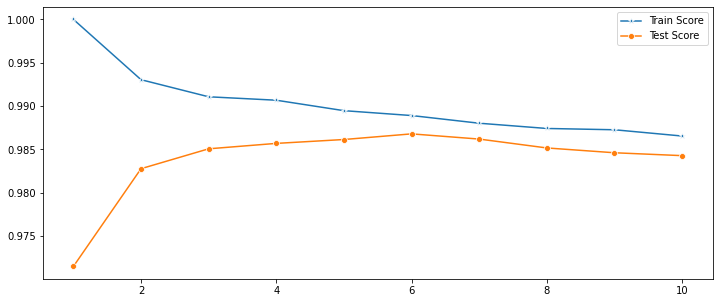

In [44]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,11),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,11),test_scores,marker='o',label='Test Score');

In [45]:
#Simple linear model gave even better results
from sklearn import linear_model
rModel= linear_model.LinearRegression().fit(X_train,y_train)
rModel.score(X_test,y_test)

0.9920767988192357

In [46]:
rModel.score(X_train,y_train)

0.9942231019728094

In [47]:
import statsmodels.api as sm
rModel2 = sm.OLS(y_train, X_train)
rModel2_results = rModel2.fit()
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          New_York_City   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2028.
Date:                Sat, 13 Mar 2021   Prob (F-statistic):          1.19e-176
Time:                        15:57:51   Log-Likelihood:                -287.65
No. Observations:                 180   AIC:                             605.3
Df Residuals:                     165   BIC:                             653.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Vermont_Burlington_Temp     0.3978      0.050      7.931      0.000       0.299       0.497
Cleveland_Temp              0.4111      0.047      8.738      0.000       0.318       0.504
Year                       -0.0043      0.017     -0.262      0.794      -0.037       0.028
Month_1                    23.1765     33.312      0.696      0.488     -42.595      88.948
Month_10                   26.1552     33.273      0.786      0.433     -39.541      91.851
Month_11                   24.1899     33.287      0.727      0.468     -41.534      89.914
Month_12                   23.9824     33.299      0.720      0.472     -41.765      89.730
Month_2                    23.0969     33.305      0.694      0.489     -42.661      88.855
Month_3                    23.1032     33.295      0.694      0.489     -42.636      88.842
Month_4                    23.1568     33.287      0.696      0.488     -42.567      88.880
Month_5                    22.7481     33.278      0.684      0.495     -42.957      88.454
Month_6                    25.5410     33.275      0.768      0.444     -40.158      91.240
Month_7                    28.2866     33.252      0.851      0.396     -37.367      93.941
Month_8                    28.0660     33.288      0.843      0.400     -37.659      93.791
Month_9                    27.3682     33.264      0.823      0.412     -38.310      93.047
==============================================================================
Omnibus:                        1.145   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.564   Jarque-Bera (JB):                1.251
Skew:                           0.164   Prob(JB):                        0.535
Kurtosis:                       2.756   Cond. No.                     2.48e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
#Gradient Boosting model gave similar results as linear model
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))
print(reg.score(X_train, y_train))

0.9916016256098702
0.9987318633885793


In [49]:
# Use the NSW 150 years of data. Only use year as the numeric feature and month as the categorical feature

NY_Temp['Year']= pd.DatetimeIndex(NY_Temp.index).year
NY_Temp['Month']= pd.DatetimeIndex(NY_Temp.index).month.astype('str')
X=NY_Temp[['Year','Month']]
y=NY_Temp['NYTemp']
X=pd.get_dummies(X)
X

,Year,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9
Date,,,,,,,,,,,,,
1869-01-01,1869,1,0,0,0,0,0,0,0,0,0,0,0
1869-02-01,1869,0,0,0,0,1,0,0,0,0,0,0,0
1869-03-01,1869,0,0,0,0,0,1,0,0,0,0,0,0
1869-04-01,1869,0,0,0,0,0,0,1,0,0,0,0,0
1869-05-01,1869,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,2019,0,0,0,0,0,0,0,0,0,0,1,0
2019-09-01,2019,0,0,0,0,0,0,0,0,0,0,0,1
2019-10-01,2019,0,1,0,0,0,0,0,0,0,0,0,0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

In [51]:
# KNN method did not work well

test_scores = []
train_scores = []

for i in range(1,6):

    knn = KNeighborsRegressor(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [52]:
for i in range(1,6):
    print('With a K number of ', i, ':')
    print('The train score is ', train_scores[i-1],',', 'And The test score is', test_scores[i-1],'.'); 

With a K number of  1 :
The train score is  1.0 , And The test score is 0.7907362375976378 .
With a K number of  2 :
The train score is  0.9448000263536622 , And The test score is 0.6726404713157614 .
With a K number of  3 :
The train score is  0.8367670945404083 , And The test score is 0.49318982771697684 .
With a K number of  4 :
The train score is  0.6945947361630156 , And The test score is 0.3877585031379691 .
With a K number of  5 :
The train score is  0.591977594974018 , And The test score is 0.3120726033609905 .


C:\Users\nshan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nshan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


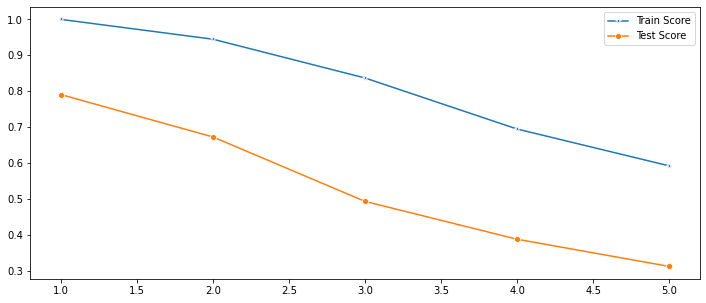

In [53]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,6),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,6),test_scores,marker='o',label='Test Score');

In [54]:
# linear model is good 
rModel= linear_model.LinearRegression().fit(X_train,y_train)
print(rModel.score(X_train,y_train))
print(rModel.score(X_test,y_test))

0.9641983430127465
0.964918686684353


In [55]:
# Gradient boosting gave simialr results as linear
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))
print(reg.score(X_train, y_train))

0.9649375033534463
0.9692803384927409


In [56]:
# Tried different learning rates
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingRegressor(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.391
Accuracy score (validation): 0.404

Learning rate:  0.1
Accuracy score (training): 0.612
Accuracy score (validation): 0.628

Learning rate:  0.25
Accuracy score (training): 0.879
Accuracy score (validation): 0.889

Learning rate:  0.5
Accuracy score (training): 0.958
Accuracy score (validation): 0.958

Learning rate:  0.75
Accuracy score (training): 0.964
Accuracy score (validation): 0.961

Learning rate:  1
Accuracy score (training): 0.966
Accuracy score (validation): 0.964



In [57]:
# Try random forest method
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9482216135460491

In [58]:
# Test linear model future prediction
X1=X.head(12).copy()
X1.Year=2050
print(rModel.predict(X1))

[35.05834318 35.80554864 43.1429971  54.24011248 65.05645815 73.89665745
 79.18218535 77.76274683 71.04947095 60.15656134 49.06849856 38.9553759 ]


In [59]:
X1.Year=2020
print(rModel.predict(X1))

[34.22019801 34.96740347 42.30485193 53.40196731 64.21831298 73.05851228
 78.34404018 76.92460166 70.21132578 59.31841617 48.23035339 38.11723072]


In [60]:
X1.Year=2100
print(rModel.predict(X1))

[36.4552518  37.20245726 44.53990572 55.6370211  66.45336677 75.29356607
 80.57909397 79.15965545 72.44637957 61.55346996 50.46540718 40.35228452]


In [61]:
# Gradient boosting gave poor future prediction
print(reg.predict(X1))

[34.96838859 36.76155633 42.41769333 53.53557374 63.40433849 71.50704628
 78.02733668 76.06816991 68.69223892 57.39050973 48.18331832 39.68655285]


In [62]:
X3=X.loc['2017-01-01':'2019-12-01'].copy()

In [63]:
delta=pd.DateOffset(years=2)
delta

<DateOffset: years=2>

In [64]:
X4=X.loc['2018-01-01':'2020-12-01'].copy()
X4.index=X4.index+delta
X4['Year']= pd.DatetimeIndex(X4.index).year

In [65]:
# Prepare data for future prediction
X_new=pd.concat([X3,X4], axis=0)
X_new.tail()

,Year,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9
Date,,,,,,,,,,,,,
2021-08-01,2021,0,0,0,0,0,0,0,0,0,0,1,0
2021-09-01,2021,0,0,0,0,0,0,0,0,0,0,0,1
2021-10-01,2021,0,1,0,0,0,0,0,0,0,0,0,0
2021-11-01,2021,0,0,1,0,0,0,0,0,0,0,0,0
2021-12-01,2021,0,0,0,1,0,0,0,0,0,0,0,0


In [66]:
#Predict 2020-2021 monthly temperature
y_new=rModel.predict(X_new)

In [67]:
X_new['Temp']=y_new

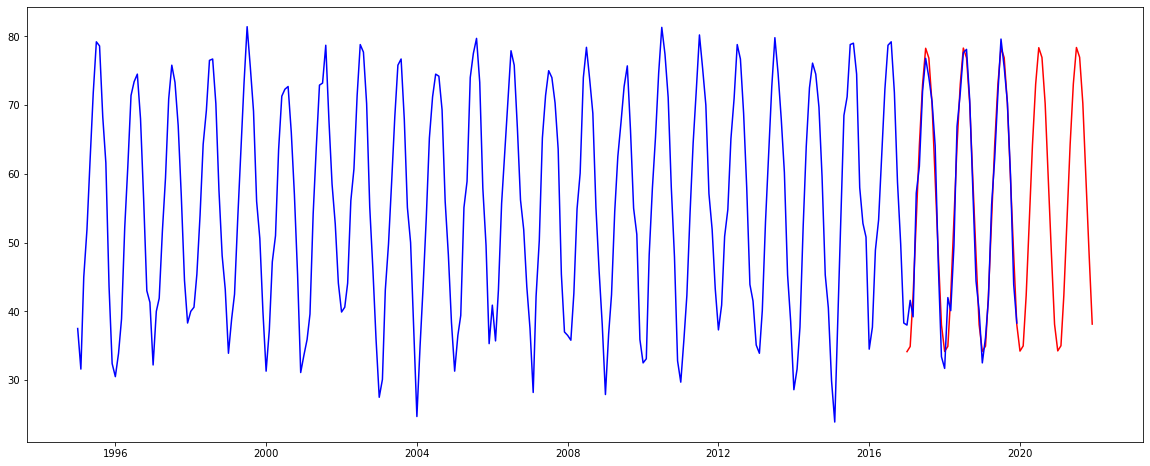

In [68]:
# Plot the 1995-2019 monthly temperature and 2017-2021 prediction from the linear model
# Comparison
plt.figure(figsize=(20, 8))
plt.plot(X_new.index,X_new['Temp'], c='r', label='Prediction')
plt.plot(NYC_Temp20.index,NYC_Temp20['NYTemp'], c ='b', label="New York City")
plt.show()

In [69]:
# Try predicting the temperature of New York city next year, knows the temperature of Cleveland, Milwaukee and Burlington.
# Try to predict the New York city temperature of the next year.

X=NYC_m[['Vermont_Burlington_Temp','Cleveland_Temp','Milwaukee_Temp','Year', 'Month']].loc['1995-01-01':'2013-12-01']
X=pd.get_dummies(X)
X

,Vermont_Burlington_Temp,Cleveland_Temp,Milwaukee_Temp,Year,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9
Date,,,,,,,,,,,,,,,,
1995-01-01,28.219355,30.325806,24.996774,1995,1,0,0,0,0,0,0,0,0,0,0,0
1995-02-01,19.696429,26.860714,25.703571,1995,0,0,0,0,1,0,0,0,0,0,0,0
1995-03-01,35.119355,40.561290,37.870968,1995,0,0,0,0,0,1,0,0,0,0,0,0
1995-04-01,40.633333,46.496667,43.356667,1995,0,0,0,0,0,0,1,0,0,0,0,0
1995-05-01,56.545161,59.435484,57.254839,1995,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-08-01,69.216129,71.306452,71.012903,2013,0,0,0,0,0,0,0,0,0,0,1,0
2013-09-01,60.476667,65.540000,64.996667,2013,0,0,0,0,0,0,0,0,0,0,0,1
2013-10-01,51.809677,55.387097,52.325806,2013,0,1,0,0,0,0,0,0,0,0,0,0


In [70]:
y=NYC_m[['New_York_City']].loc['1996-01-01':'2014-12-01']
NYC_m

,Vermont_Burlington_Temp,Cleveland_Temp,New_York_City,Milwaukee_Temp,Month,Year
Date,,,,,,
1995-01-01,28.219355,30.325806,37.829032,24.996774,1,1995
1995-02-01,19.696429,26.860714,31.985714,25.703571,2,1995
1995-03-01,35.119355,40.561290,44.370968,37.870968,3,1995
1995-04-01,40.633333,46.496667,51.003333,43.356667,4,1995
1995-05-01,56.545161,59.435484,61.529032,57.254839,5,1995
...,...,...,...,...,...,...
2014-08-01,68.522581,70.267742,74.438710,69.503226,8,2014
2014-09-01,62.190000,63.510000,70.153333,61.936667,9,2014
2014-10-01,53.525806,53.580645,60.254839,51.319355,10,2014


In [71]:
delta2=pd.DateOffset(years=1)
print(y)
y.index=y.index-delta2
print(y)
y=y.rename(columns={'New_York_City':'NYC_nextyear'})
y

            New_York_City
Date                     
1996-01-01      32.077419
1996-02-01      34.837931
1996-03-01      39.303226
1996-04-01      51.903333
1996-05-01      59.161290
...                   ...
2014-08-01      74.438710
2014-09-01      70.153333
2014-10-01      60.254839
2014-11-01      45.160000
2014-12-01      40.396774

[228 rows x 1 columns]
            New_York_City
Date                     
1995-01-01      32.077419
1995-02-01      34.837931
1995-03-01      39.303226
1995-04-01      51.903333
1995-05-01      59.161290
...                   ...
2013-08-01      74.438710
2013-09-01      70.153333
2013-10-01      60.254839
2013-11-01      45.160000
2013-12-01      40.396774

[228 rows x 1 columns]


,NYC_nextyear
Date,
1995-01-01,32.077419
1995-02-01,34.837931
1995-03-01,39.303226
1995-04-01,51.903333
1995-05-01,59.161290
...,...
2013-08-01,74.438710
2013-09-01,70.153333
2013-10-01,60.254839


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=38)

In [77]:
# First try KNN method.

from sklearn.neighbors import KNeighborsRegressor


test_scores = []
train_scores = []

for i in range(1,11):

    knn = KNeighborsRegressor(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [78]:
for i in range(1,11):
    print('With a K number of ', i, ':')
    print('The train score is ', train_scores[i-1],',', 'And The test score is', test_scores[i-1],'.'); 

With a K number of  1 :
The train score is  1.0 , And The test score is 0.8178443482690734 .
With a K number of  2 :
The train score is  0.9710681255368916 , And The test score is 0.8610166854019852 .
With a K number of  3 :
The train score is  0.9554094997735982 , And The test score is 0.8801231462541197 .
With a K number of  4 :
The train score is  0.9540053469615203 , And The test score is 0.8883318054255024 .
With a K number of  5 :
The train score is  0.9512864052736654 , And The test score is 0.8918195157640436 .
With a K number of  6 :
The train score is  0.9493615754026443 , And The test score is 0.8976243707026762 .
With a K number of  7 :
The train score is  0.9483853556443896 , And The test score is 0.900328367750607 .
With a K number of  8 :
The train score is  0.9469615409817355 , And The test score is 0.9021189702672104 .
With a K number of  9 :
The train score is  0.9445418546239396 , And The test score is 0.9042483353521464 .
With a K number of  10 :
The train score is 

In [75]:
#Linear model is still the best

rModel= linear_model.LinearRegression().fit(X_train,y_train)
print('The train score is:', rModel.score(X_train,y_train))
print('The test score is:', rModel.score(X_test,y_test))

The train score is: 0.9746919811151615
The test score is: 0.9443817775204436


In [79]:
# Gradient Boosting got good train socre but poor test score.

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.993528007051895
0.9321127090367841


C:\Users\nshan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
